In [1]:
import cheetah
import matplotlib.pyplot as plt

import ARESlatticeStage3v1_9 as lattice

In [2]:
beam1 = cheetah.ParameterBeam.from_astra("../distributions/ACHIP_EA1_2021.1351.001")
print(beam1)
beam2 = cheetah.ParticleBeam.from_astra("../distributions/ACHIP_EA1_2021.1351.001")
print(beam2)

ParameterBeam(mu_x=0.000001, mu_xp=0.000000, mu_y=-0.000002, mu_yp=-0.000000, sigma_x=0.000175, sigma_xp=0.000004, sigma_y=0.000175, sigma_yp=0.000004, sigma_s=0.000008, sigma_p=0.002280, energy=107315902.444)
ParticleBeam(n=100000, mu_x=0.000001, mu_xp=0.000000, mu_y=-0.000002, mu_yp=-0.000000, sigma_x=0.000175, sigma_xp=0.000004, sigma_y=0.000175, sigma_yp=0.000004, sigma_s=0.000008, sigma_p=0.002280, energy=107315902.444)


In [4]:
cell = cheetah.utils.subcell_of(lattice.cell, "AREASOLA1", "AREABSCR1")
segment = cheetah.Segment.from_ocelot(cell, warnings=False)
segment.AREABSCR1.binning = 4
segment.AREABSCR1.is_active = False
segment.AREAMQZM1.k1 = 3.1
segment.AREAMQZM2.k1 = -3.1
segment.AREAMCVM1.angle = 1e-3
segment.AREAMQZM3.k1 = 4.2
segment.AREAMCHM1.angle = 2e-3

In [4]:
result1 = segment(beam1)
print(result1)
result2 = segment(beam2)
print(result2)

ParameterBeam(mu_x=0.000900, mu_xp=0.002000, mu_y=0.001069, mu_yp=0.001136, sigma_x=0.000081, sigma_xp=0.000078, sigma_y=0.000278, sigma_yp=0.000098, sigma_s=0.000008, sigma_p=0.002280, energy=107315902.444)
ParticleBeam(n=100000, mu_x=0.000900, mu_xp=0.002000, mu_y=0.001069, mu_yp=0.001136, sigma_x=0.000081, sigma_xp=0.000078, sigma_y=0.000278, sigma_yp=0.000098, sigma_s=0.000008, sigma_p=0.002280, energy=107315902.444)


In [5]:
segment.AREABSCR1.is_active = True

I'm an empty beam!
I'm an empty beam!


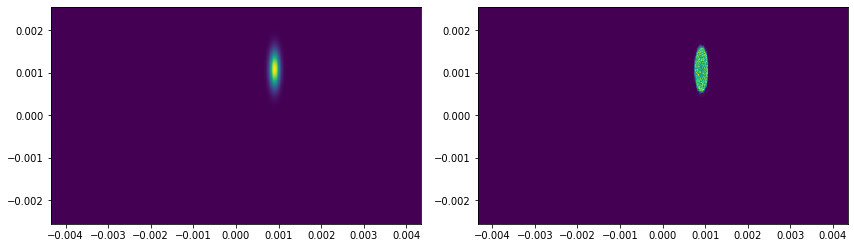

In [6]:
plt.figure(figsize=(12,4))

result1 = segment(beam1)
print(result1)
plt.subplot(121)
plt.imshow(segment.AREABSCR1.reading, interpolation="None", extent=segment.AREABSCR1.extent)

result2 = segment(beam2)
print(result2)
plt.subplot(122)
plt.imshow(segment.AREABSCR1.reading, interpolation="None", extent=segment.AREABSCR1.extent)

plt.tight_layout()
plt.show()

In [7]:
segment.AREABSCR1.extent

(-0.0043437312, 0.0043437312, -0.002550306, 0.002550306)